<a href="https://colab.research.google.com/github/Tushar12S/Fake-News-Classification/blob/main/fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [6]:
df['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
# drop unnecessary columns
df = df.drop(columns=['id', 'title', 'author'], axis=1)

In [9]:
# drop null values
df = df.dropna(axis=0)

In [10]:
len(df)

20761

In [11]:
df['clean_news'] = df['text'].str.lower()
df['clean_news']

,clean_news
0,house dem aide: we didn’t even see comey’s let...
1,ever get the feeling your life circles the rou...
2,"why the truth might get you fired october 29, ..."
3,videos 15 civilians killed in single us airstr...
4,print \nan iranian woman has been sentenced to...
...,...
20795,rapper t. i. unloaded on black celebrities who...
20796,when the green bay packers lost to the washing...
20797,the macy’s of today grew from the union of sev...
20798,"nato, russia to hold parallel exercises in bal..."


In [12]:
df['clean_news'] = df['clean_news'].str.replace('[^A-Za-z0-9\s]', '')
df['clean_news'] = df['clean_news'].str.replace('\n', '')
df['clean_news'] = df['clean_news'].str.replace('\s+', ' ')
df['clean_news']

,clean_news
0,house dem aide: we didn’t even see comey’s let...
1,ever get the feeling your life circles the rou...
2,"why the truth might get you fired october 29, ..."
3,videos 15 civilians killed in single us airstr...
4,print an iranian woman has been sentenced to s...
...,...
20795,rapper t. i. unloaded on black celebrities who...
20796,when the green bay packers lost to the washing...
20797,the macy’s of today grew from the union of sev...
20798,"nato, russia to hold parallel exercises in bal..."


In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
# remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['clean_news'] = df['clean_news'].apply(lambda x: " ".join([word for word in x.split() if word not in stop]))
df.head()

,text,label,clean_news
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,house dem aide: didn’t even see comey’s letter...
1,Ever get the feeling your life circles the rou...,0,ever get feeling life circles roundabout rathe...
2,"Why the Truth Might Get You Fired October 29, ...",1,"truth might get fired october 29, 2016 tension..."
3,Videos 15 Civilians Killed In Single US Airstr...,1,videos 15 civilians killed single us airstrike...
4,Print \nAn Iranian woman has been sentenced to...,1,print iranian woman sentenced six years prison...


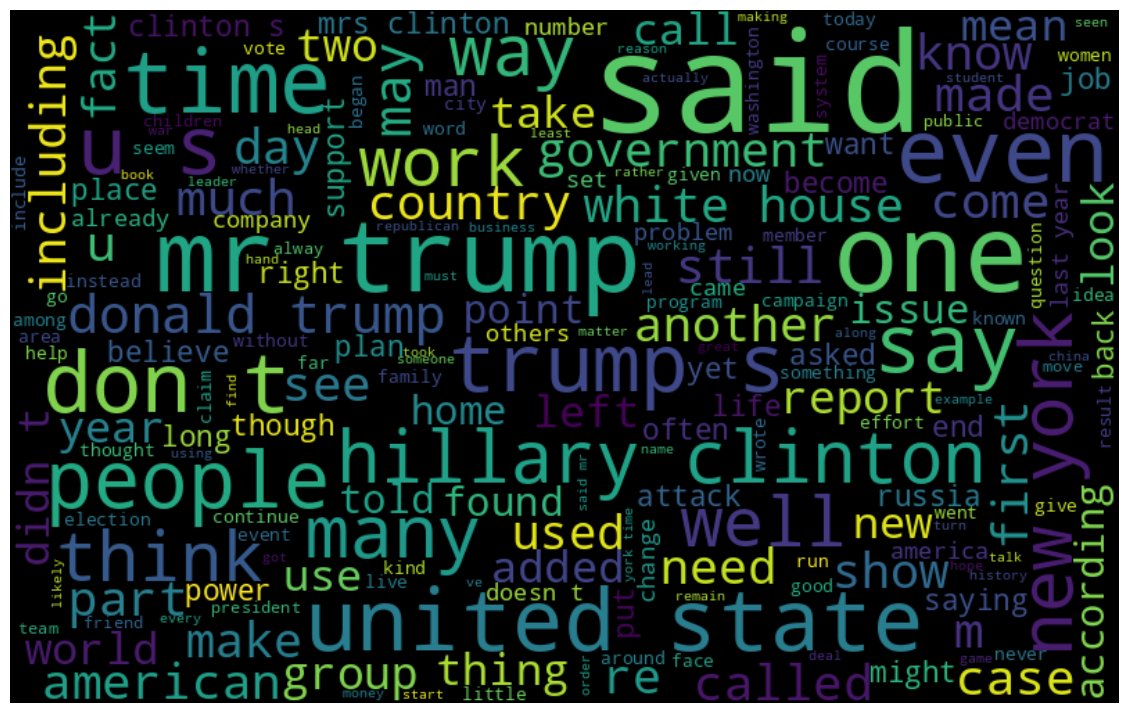

In [15]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_news']])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

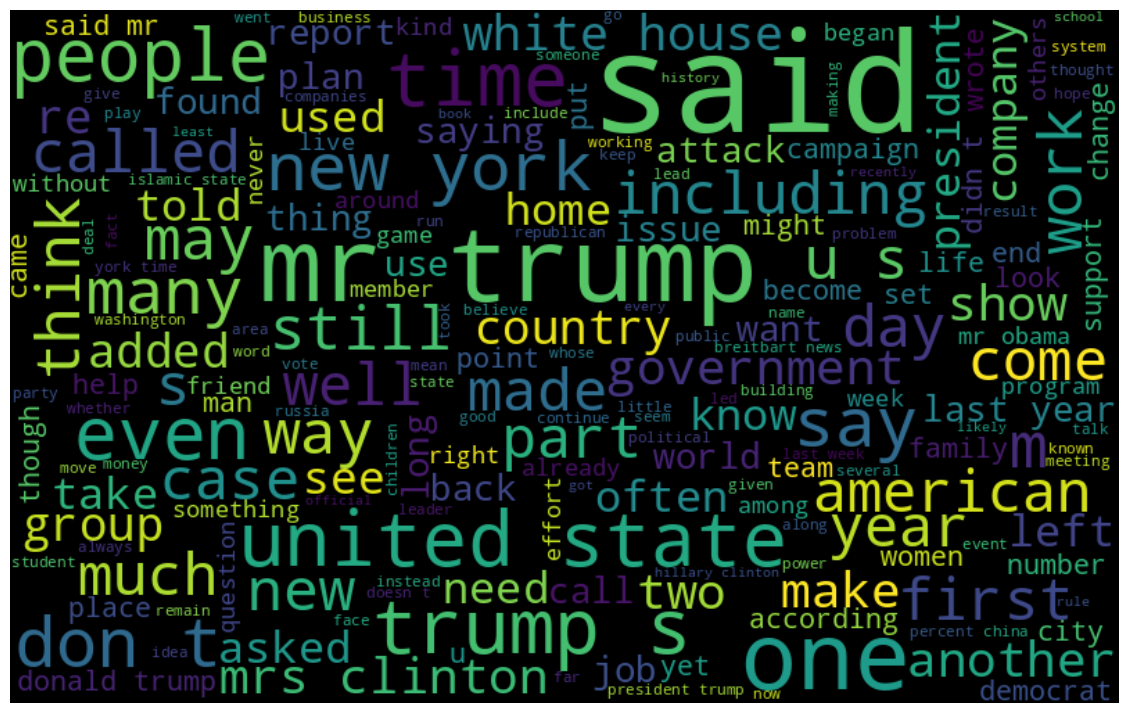

In [16]:
# visualize the frequent words for genuine news
all_words = " ".join([sentence for sentence in df['clean_news'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

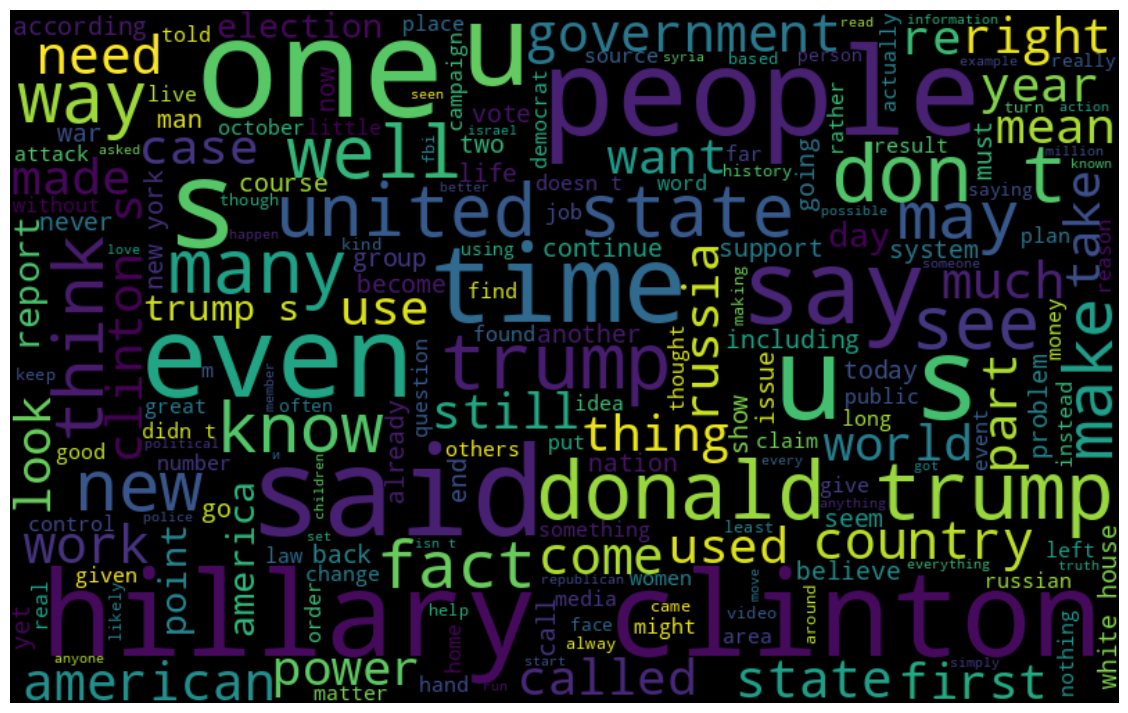

In [17]:
# visualize the frequent words for fake news
all_words = " ".join([sentence for sentence in df['clean_news'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
!pip install keras

In [19]:
# Install tensorflow which includes keras
!pip install tensorflow


In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [21]:
# tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_news'])
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

239494

In [22]:
# padding data
sequences = tokenizer.texts_to_sequences(df['clean_news'])
padded_seq = pad_sequences(sequences, maxlen=500, padding='post', truncating='post')

In [23]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-12-06 10:39:34--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-12-06 10:39:34--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-12-06 10:39:34--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [24]:
# create embedding index
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

In [25]:
# create embedding matrix
embedding_matrix = np.zeros((vocab_size+1, 100))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [26]:
embedding_matrix[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
embedding_matrix[1]

array([ 0.13342001,  0.19998001, -0.25533   , -0.051146  ,  0.11102   ,
        0.31290999,  0.20461001, -0.16978   ,  0.23591   , -0.19870999,
        0.27361   , -0.44758999,  0.15266   ,  0.36144999,  0.042599  ,
       -0.375     ,  0.35876   ,  0.38881999, -0.71937001,  0.45868   ,
       -0.026418  , -0.28536001, -0.30691999, -0.27586001,  0.19926   ,
        0.36140999,  0.11371   , -0.34173   ,  0.44716999,  0.027599  ,
       -0.12358   ,  0.43586001, -0.043002  ,  0.019661  ,  0.0075122 ,
       -0.092998  , -0.14560001,  0.21397001,  0.043995  , -0.78390002,
       -0.082397  , -0.27105001, -0.29763001,  0.18043999, -0.18894   ,
       -0.75373   , -0.23617999,  0.019604  , -0.38022   , -0.10602   ,
       -0.031779  ,  0.37211999,  0.20428   ,  1.02499998, -0.24906   ,
       -2.09050012,  0.12701   ,  0.043019  ,  0.99423999,  0.025519  ,
       -0.12768   ,  0.68374002, -0.45173001, -0.36655   ,  1.12810004,
       -0.16283999,  0.18392999, -0.32929999,  0.73676997, -0.30

In [28]:
padded_seq[1]

array([   263,     33,   1664,     98,   5161,  29152,    455,   2398,
         2133,    400,    585,   1649,   5599,     34,     13,    851,
          195,    401,   2018,  18232,    860,  21158,   3122,   2786,
          692,    794,    274,   2102,   3296,  11420,    141,     43,
         2279,  92511,   3242,   3788,   3712,   3296,    857,    174,
         3592,     34,  10160,  58240,   3369,     20,    233,     23,
         3345,  21158,  10415,    618,     12,    526,   2537,   2552,
         8371,    512,    743,   1539,    668,    157,     16,  23486,
          955,  25165,    354,     10,    178,   3833,     60,  11867,
          931,   2822,     19,    890,   5150,    190,     53,   5617,
         2279,   4668,     46,    275,    857,    224,     15,      4,
         2267,     15,      1,   2279,  10160,     67,   8823,  11583,
       125498,  21595,   3905, 125499,  92512, 125500,   5696,  33536,
        28289,   8340,  19700,  75640,   4604,      4,    176,    278,
      

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(padded_seq, df['label'], test_size=0.20, random_state=42, stratify=df['label'])

In [30]:
from keras.layers import LSTM, Dropout, Dense, Embedding
from keras import Sequential

# model = Sequential([
#     Embedding(vocab_size+1, 100, weights=[embedding_matrix], trainable=False),
#     Dropout(0.2),
#     LSTM(128, return_sequences=True),
#     LSTM(128),
#     Dropout(0.2),
#     Dense(512),
#     Dropout(0.2),
#     Dense(256),
#     Dense(1, activation='sigmoid')
# ])

model = Sequential([
    Embedding(vocab_size+1, 100, weights=[embedding_matrix], trainable=False),
    Dropout(0.2),
    LSTM(128),
    Dropout(0.2),
    Dense(256),
    Dense(1, activation='sigmoid')
])

In [31]:
model.compile(loss=['binary_crossentropy'], optimizer='adam', metrics=['accuracy']) # Changed code: enclosed 'accuracy' in a list
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │      23,949,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,949,500 (91.36 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,949,500 (91.36 MB)

In [32]:
# train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 214s 3s/step - accuracy: 0.6225 - loss: 0.6529 - val_accuracy: 0.6525 - val_loss: 0.6275
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.6801 - loss: 0.5953 - val_accuracy: 0.6730 - val_loss: 0.5890
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 259s 3s/step - accuracy: 0.6765 - loss: 0.6092 - val_accuracy: 0.6239 - val_loss: 0.6477
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 208s 3s/step - accuracy: 0.6264 - loss: 0.6450 - val_accuracy: 0.6875 - val_loss: 0.5817
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 262s 3s/step - accuracy: 0.6282 - loss: 0.6506 - val_accuracy: 0.6251 - val_loss: 0.6356
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.6434 - loss: 0.6184 - val_accuracy: 0.7582 - val_loss: 0.5373
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 263s 3s/step - accuracy: 0.6401 - loss: 0.6314 - val_accuracy: 0.6258 - val_loss: 0.6400
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 282s 4s/step - accuracy: 0.6195 - loss: 0.6419 - val_accuracy: 0.6316 - v

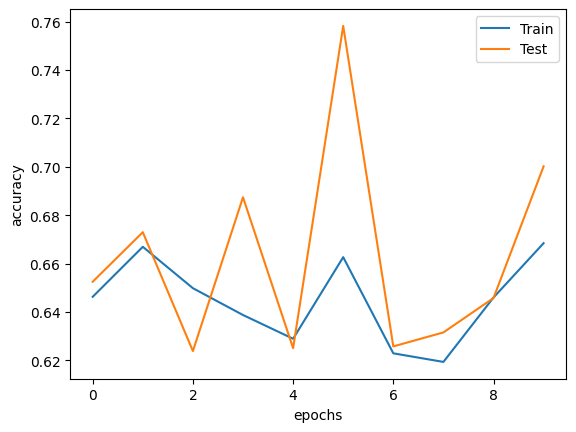

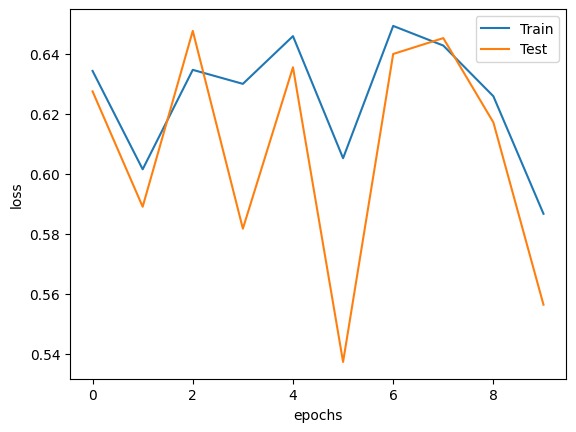

In [33]:
# visualize the results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Test'])
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Train', 'Test'])
plt.show()